In [13]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt

Wczytujemy plik

In [14]:
vid = mpe.VideoFileClip("t3.mkv")

Każdą klatkę zamieniamy na kolumnę w macierzy

In [15]:
def matrix_creator(vid, fps=30):
    return np.vstack([rgb2gray(vid.get_frame(i/float(fps))).astype(int).flatten() for i in range(fps * int(vid.duration))]).T

Oraz konwertujemy RGB na odcienie szarości, przez co każdy piksel składa się z jednej liczby

In [16]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

Zmniejszam rozdzielczość, ponieważ przy 1920x1080 jupyterowi brakuje pamięci

In [17]:
dims = (190,300)
vid=vid.resize((300,190))

In [18]:
M = matrix_creator(vid.subclip())

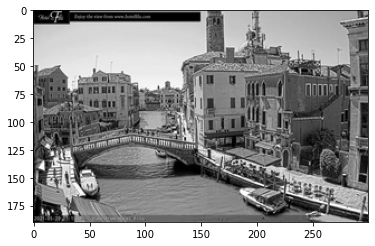

In [19]:
plt.imshow(np.reshape(M[:,50], dims), cmap='gray');

Na poniższym img możemy zobaczyć które piksele się zmieniają

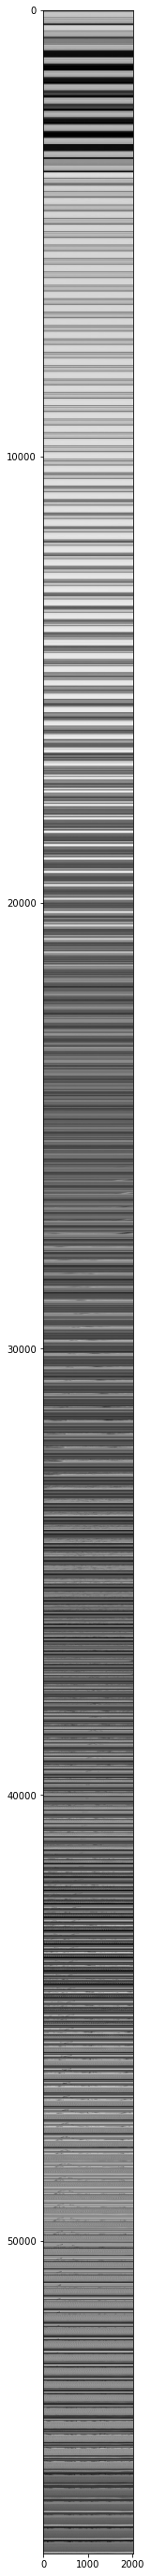

In [23]:
plt.figure(figsize=(20, 50))
plt.imshow(M, cmap='gray')

In [24]:
U, s, V = np.linalg.svd(M, full_matrices=False)

In [41]:
number_of = 1
frame = 1400

In [43]:
low_rank = (U[:,0:number_of] * s[0:number_of])@V[0:number_of,:]

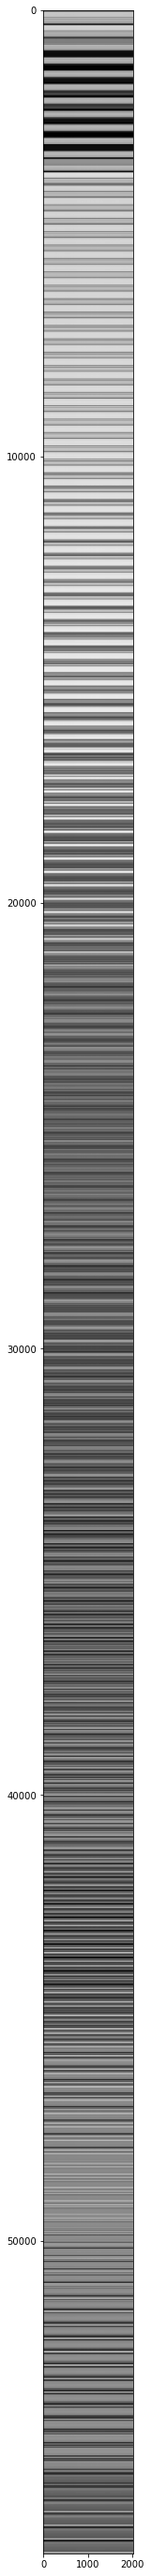

In [45]:
plt.figure(figsize=(20, 50))
plt.imshow(low_rank, cmap='gray')

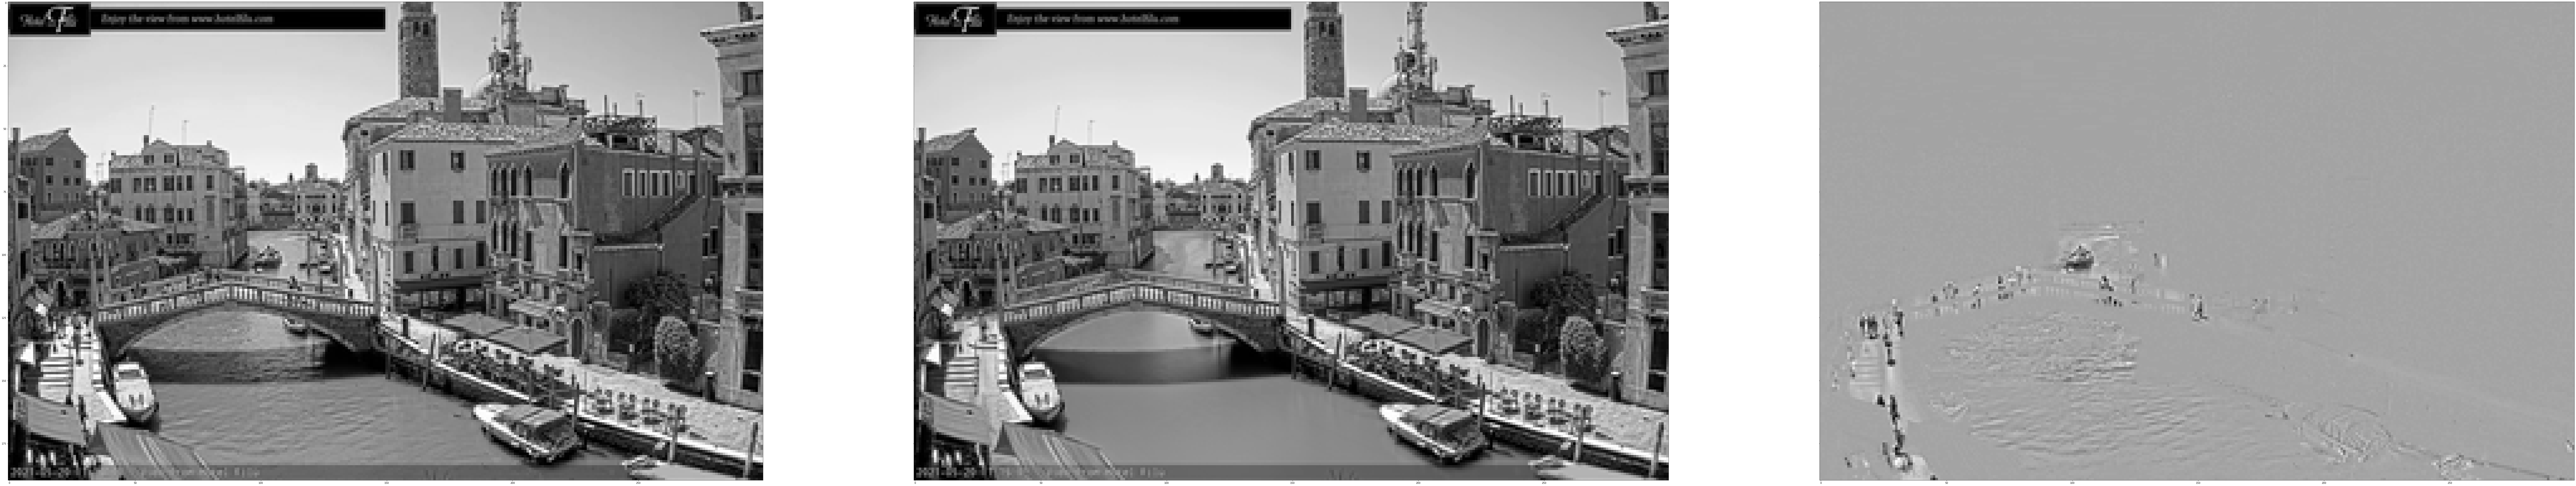

In [44]:
f, axarr = plt.subplots(nrows=1, ncols=3,sharey=True, figsize = dims) 
axarr[0].imshow(np.reshape(M[:,frame], dims), cmap='gray');
axarr[1].imshow(np.reshape(low_rank[:,frame], dims), cmap='gray');
axarr[2].imshow(np.reshape(M[:,frame] - low_rank[:,frame], dims), cmap='gray');